# Simulation of Transcription as Coin Toss
## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).

2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.

3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, and 3.


In [ ]:
# For Instalations

%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.10.5" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia Random Plots Statistics Distributions"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.10.5 on the current Colab Runtime...
2024-11-22 08:00:25 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.5-linux-x86_64.tar.gz [173909866/173909866] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package Random...
Installing Julia package Plots...
Installing Julia package Statistics...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.10

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.10.5
Commit 6f3fdf7b362 (2024-08-27 14:19 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Simulate transcription as coin toss

Rate of transcription, lambda = 2

Total time, T = 10

Therefore, the average number of mRNA produced in time T,

mu = lambda*T = 20

Let's divide the total time in 1000 time steps. So, number of time steps, N = 1000.

Following binomial distribution, mu = p* N, here p is the probability of production of one mRNA at a particular interval

So, p = mu/N = 20/1000 = 0.02

In [ ]:
# Inputs for simulation

# Number of time steps
time_steps = 1000

# Probability of head
p = 0.02

# Initial number of mRNA
m0 = 0

# Number of repeats of the experiment
N = 1000

1000

In [ ]:
# Get required packages
using Random
using Plots
using Statistics

In [ ]:
# This function simulate transcrition as seriese of coin tosses
# Inputs:
# time_steps: Number of discrete time points
# p: probability of having a mRNA at a time point

function transcription_toss(time_steps, p, m0)

    # Do T coin tosses with probability p
    # Store the cumulative count
    num_mRNA_cumulative = cumsum(rand(time_steps) .<= p)

    # Prepend the initial count m0
    return [m0; num_mRNA_cumulative .+ m0]
end

transcription_toss (generic function with 1 method)

In [ ]:
# perform one simulation
mRNA_count = transcription_toss(time_steps,p, m0)

# Print result
println("Number of mRNA produced = ", mRNA_count[end])

Number of mRNA produced = 26


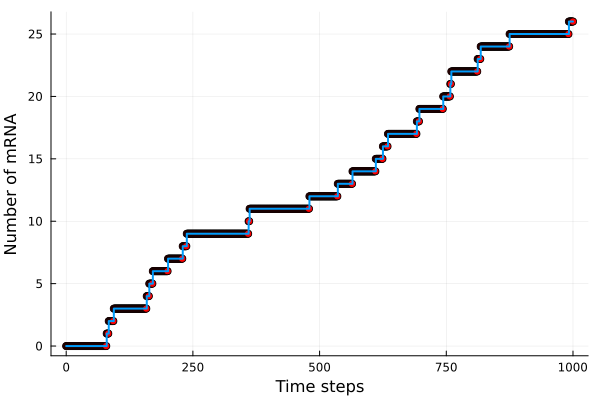

In [ ]:
# Plot the data
plot(0:time_steps, mRNA_count,
    xlabel="Time steps", ylabel="Number of mRNA",
    scatter=:auto, marker=:circle, markercolor=:red,
    lw=2, line=:steppost,
    legend=:none)

In [ ]:
# Perform multiple repeats of the simulation

# Data holder
data = zeros(time_steps + 1, N)

# Do simulations
for j in 1:N
    data[:,j] = transcription_toss(time_steps,p, m0)
end

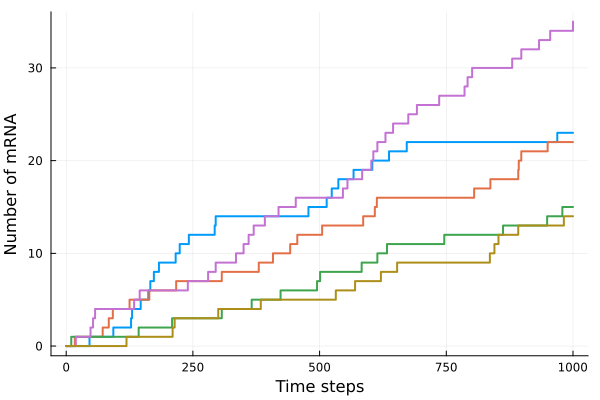

In [ ]:
# Plot result few independent runs

plot(0:time_steps, data[:, 1:5],
    xlabel="Time steps", ylabel="Number of mRNA",
    lw=2, line=:steppost,
    legend=:none)

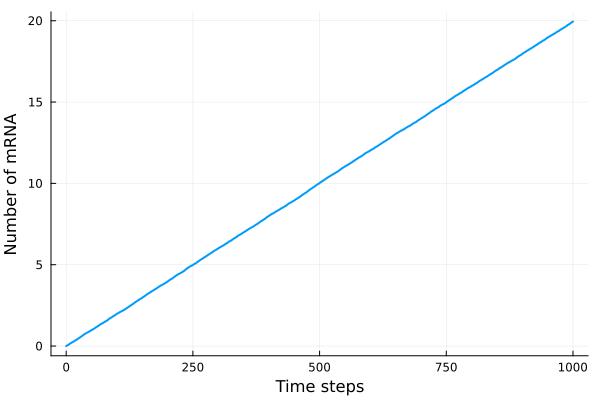

In [ ]:
# Plot the average of multiple simulations

# Get the row average of the data matrix
avg_data = mean(data, dims = 2)

# Plot the average data
plot(0:time_steps, avg_data,
    xlabel="Time steps", ylabel="Number of mRNA",
    lw=2,
    legend=:none)

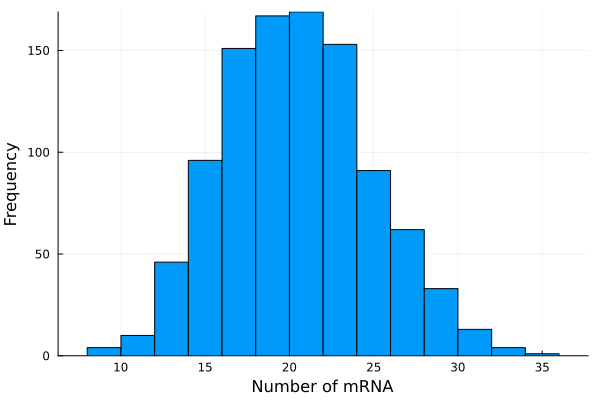

In [ ]:
# Plot histogram to show distribution of mRNA in cells at the end

# Extract the last row
final_mRNA = data[end, :]

# Plot the histogram
histogram(final_mRNA, bins=20,  xlabel="Number of mRNA", ylabel="Frequency", legend=:none)